In [45]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [46]:
import pathlib 
import os
import  shutil

dir_path= pathlib.Path.cwd()
print(dir_path)
def read_file():
    dir_folder= pathlib.Path.cwd().parent
    input_path = dir_folder/ "data" / "diabetes"
    file_name = "diabetes.csv"
    df= pd.read_csv(os.path.join(input_path,file_name))
    return df

df = read_file()


c:\Abdelouaheb\perso\Ph\machine_learning_pipeline\diabetes


In [47]:
# Data shape and Variable types
#print(df.head())
print("#"*50)
print(df.info())


##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [48]:
# Missing values count
df.isnull().sum()
# Missing values percentage
round(df.isnull().sum()/df.shape[0],2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [49]:
# Balanced or Unbalanced data 
round(df["Outcome"].value_counts()/df.shape[0]*100,0).astype(int).astype(str) + "%"

Outcome
0    65%
1    35%
Name: count, dtype: object

In [50]:
# univarie analysis 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


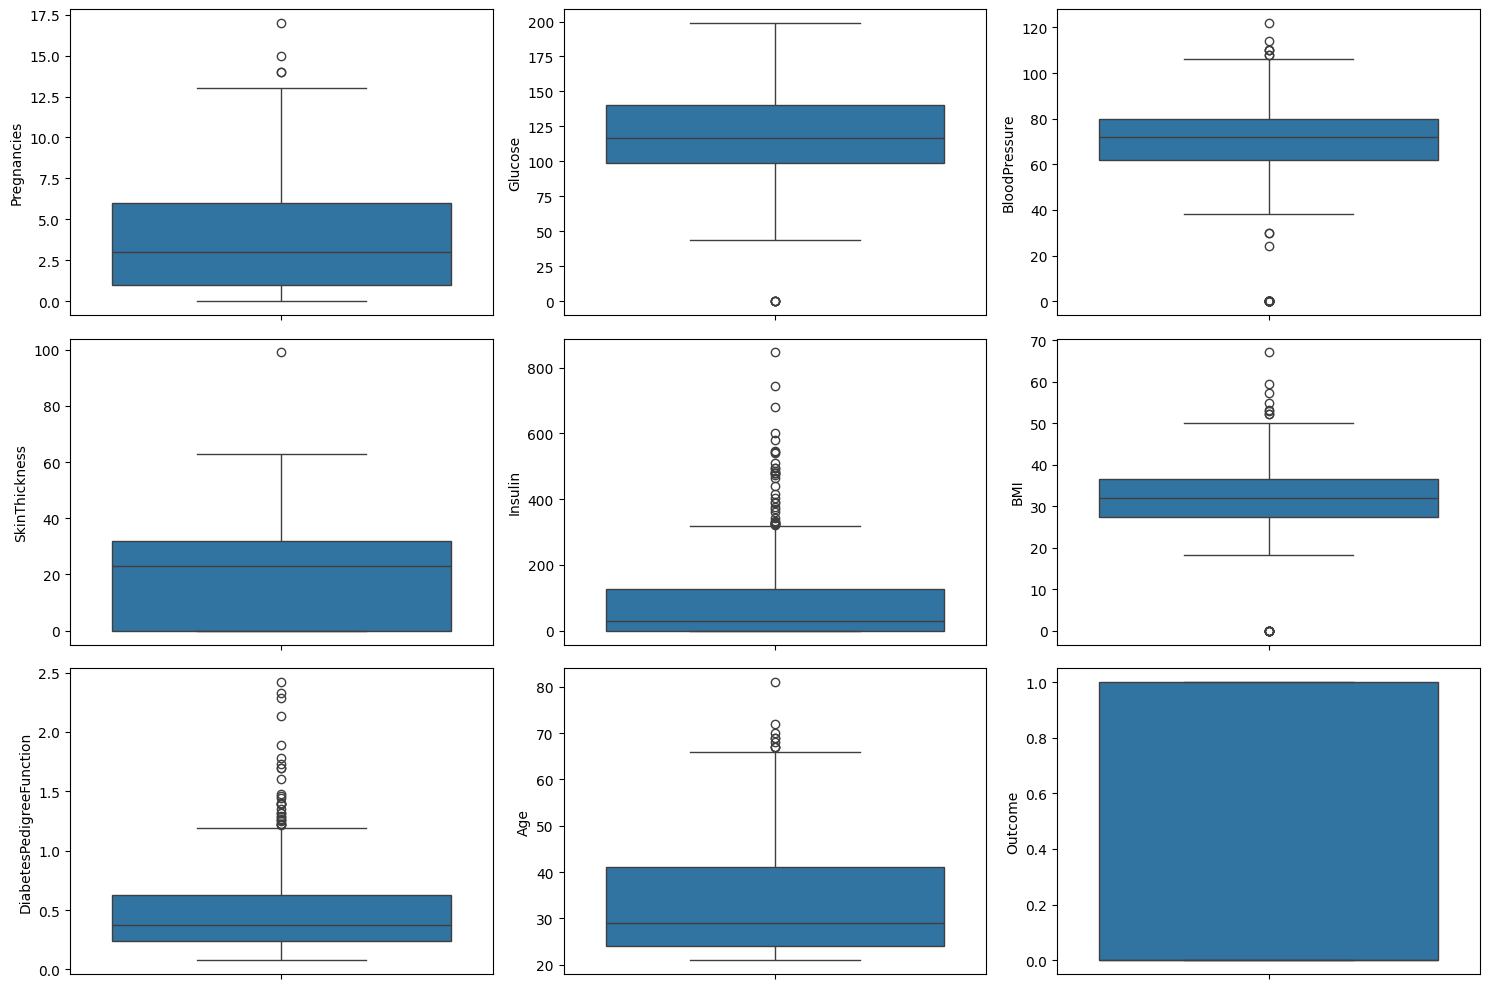

In [51]:
# Outliers
import seaborn as sns 
fig, axes = plt.subplots(3,3, figsize=(15,10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i,3)
    sns.boxplot(data=df,y=col,ax=axes[row, col_position])
    plt.tight_layout()
plt.show()


In [52]:
# importing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [53]:
# Lets calculate mutual information then move on to visualize correlation and mutual information

tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

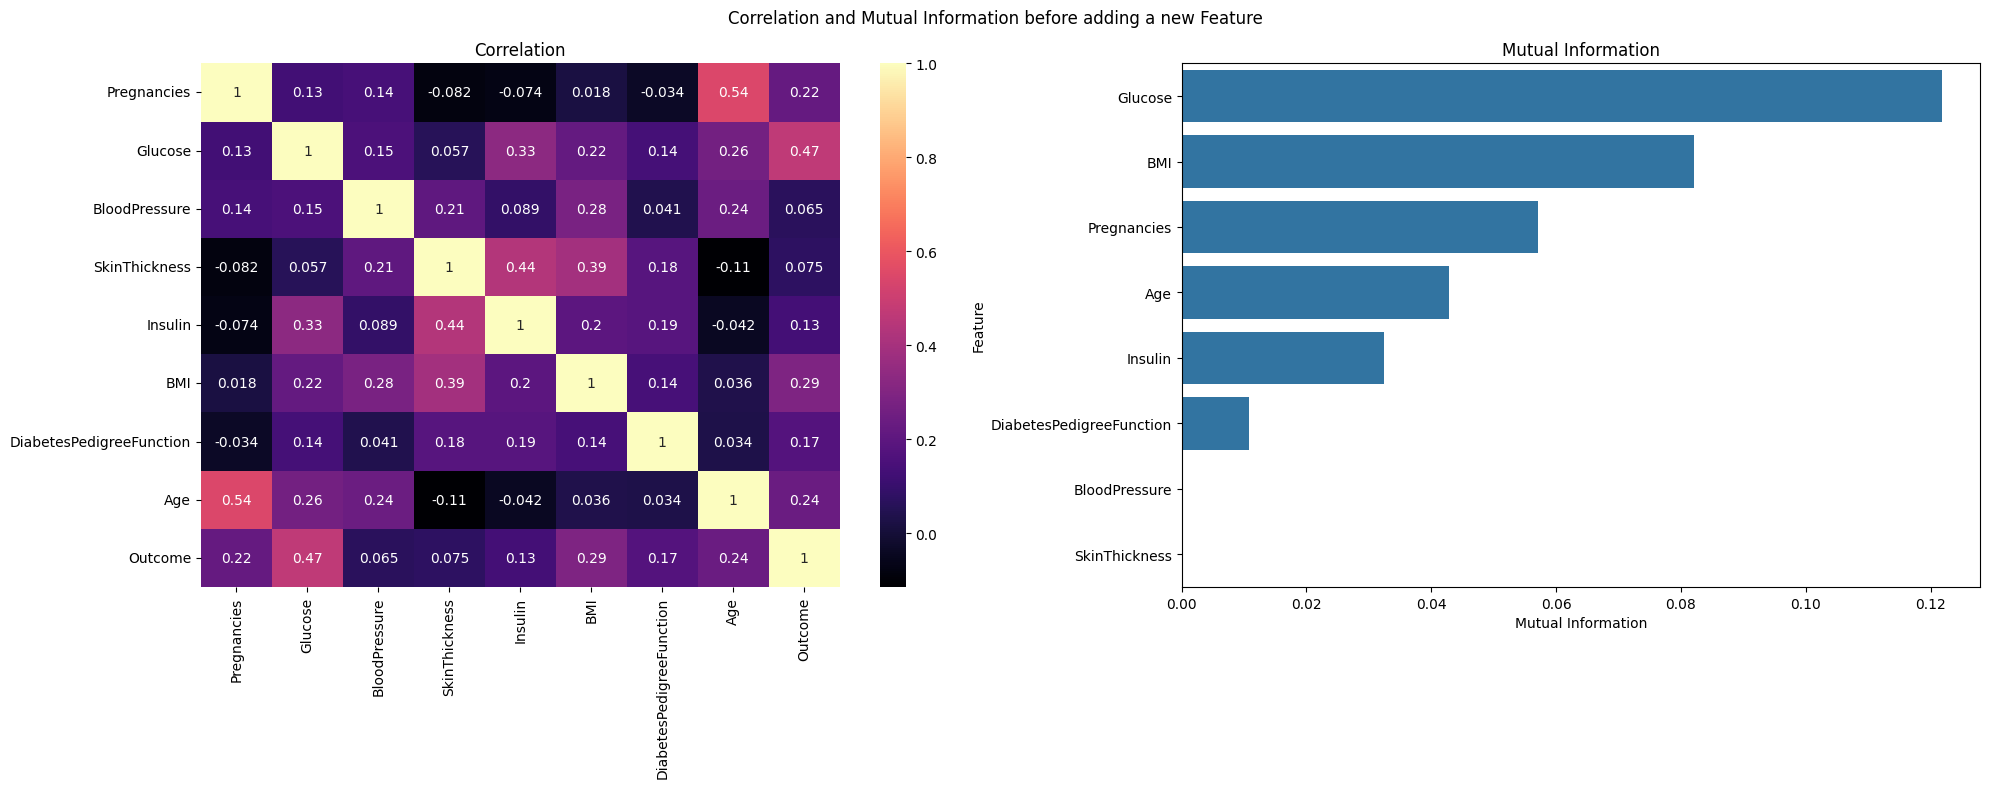

In [54]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information before adding a new Feature')
plt.tight_layout()
plt.show()

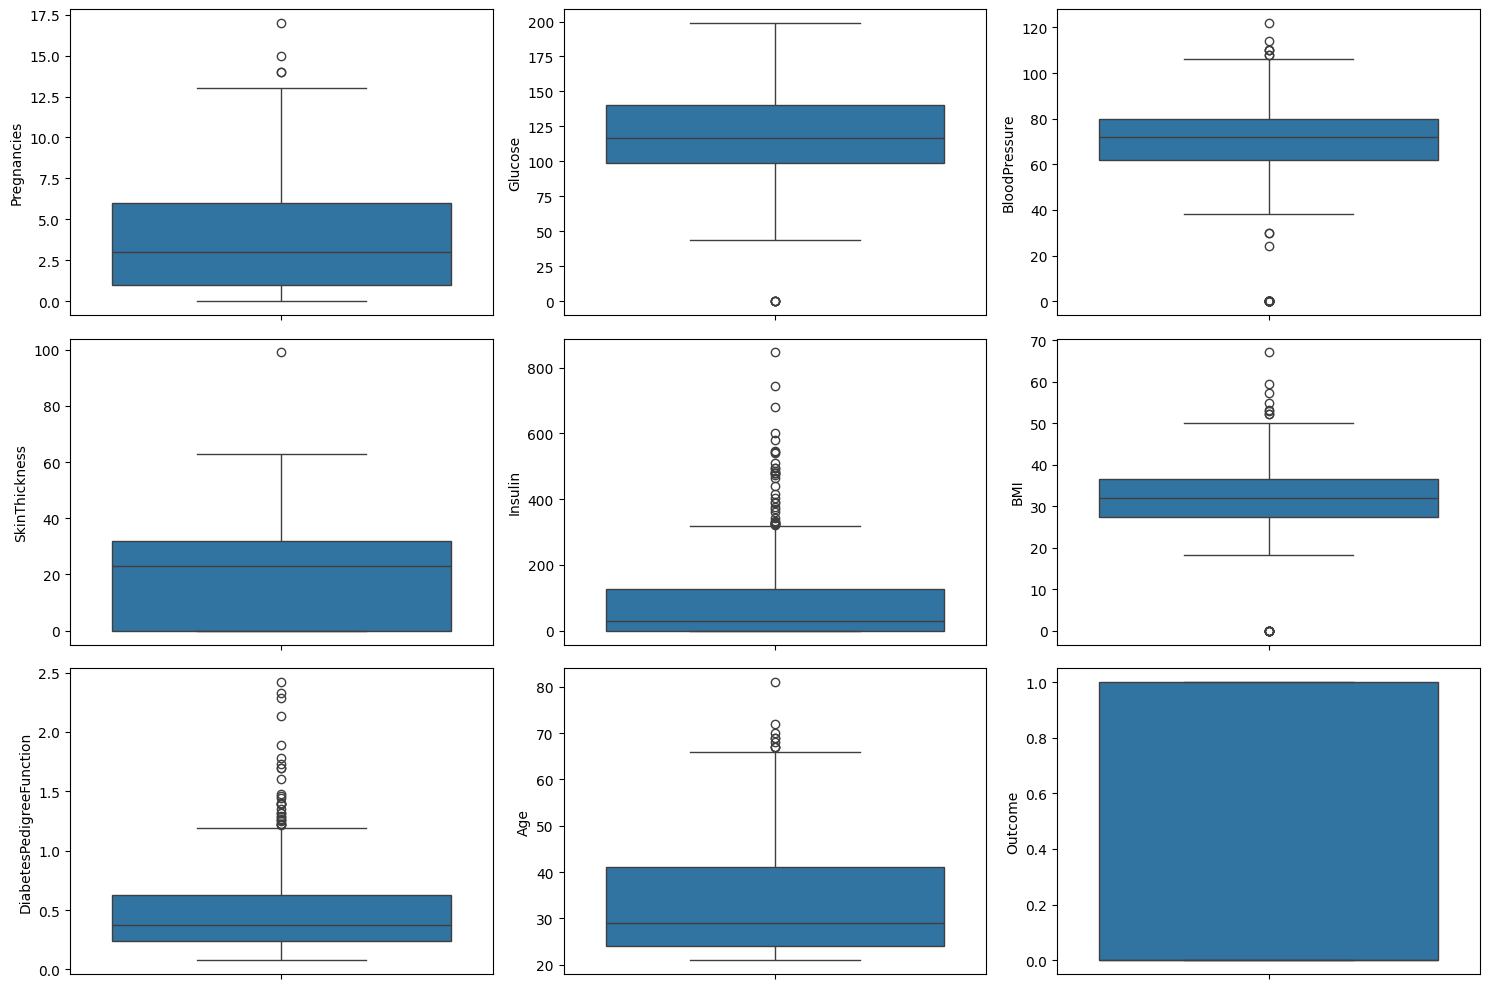

In [55]:
# Outliers
import seaborn as sns 
fig, axes = plt.subplots(3,3, figsize=(15,10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i,3)
    sns.boxplot(data=df,y=col,ax=axes[row, col_position])
    plt.tight_layout()
plt.show()

In [56]:
max = df['Age'].max()
min = df['Age'].min()
print(max,min)

81 21


In [57]:
bins=[20,36,51,66,float('inf')]  # Define bin edges
labels=['Young Adults','Middle-Aged Adults','Older Adults','Seniors']  # Define labels
df['Age_Category']=pd.cut(df['Age'],bins=bins,labels=labels, right=True)
# Initialize the encoder
on = OrdinalEncoder()

le=LabelEncoder()
df['Age_Category']=le.fit_transform(df['Age_Category']) # Encoding categorical column
df['Normalized_Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

In [58]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Category,Normalized_Age
0,6,148,72,35,0,33.6,0.627,50,1,0,0.483333
1,1,85,66,29,0,26.6,0.351,31,0,3,0.166667
2,8,183,64,0,0,23.3,0.672,32,1,3,0.183333
3,1,89,66,23,94,28.1,0.167,21,0,3,0.000000
4,0,137,40,35,168,43.1,2.288,33,1,3,0.200000
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,0.700000
764,2,122,70,27,0,36.8,0.340,27,0,3,0.100000
765,5,121,72,23,112,26.2,0.245,30,0,3,0.150000
766,1,126,60,0,0,30.1,0.349,47,1,0,0.433333


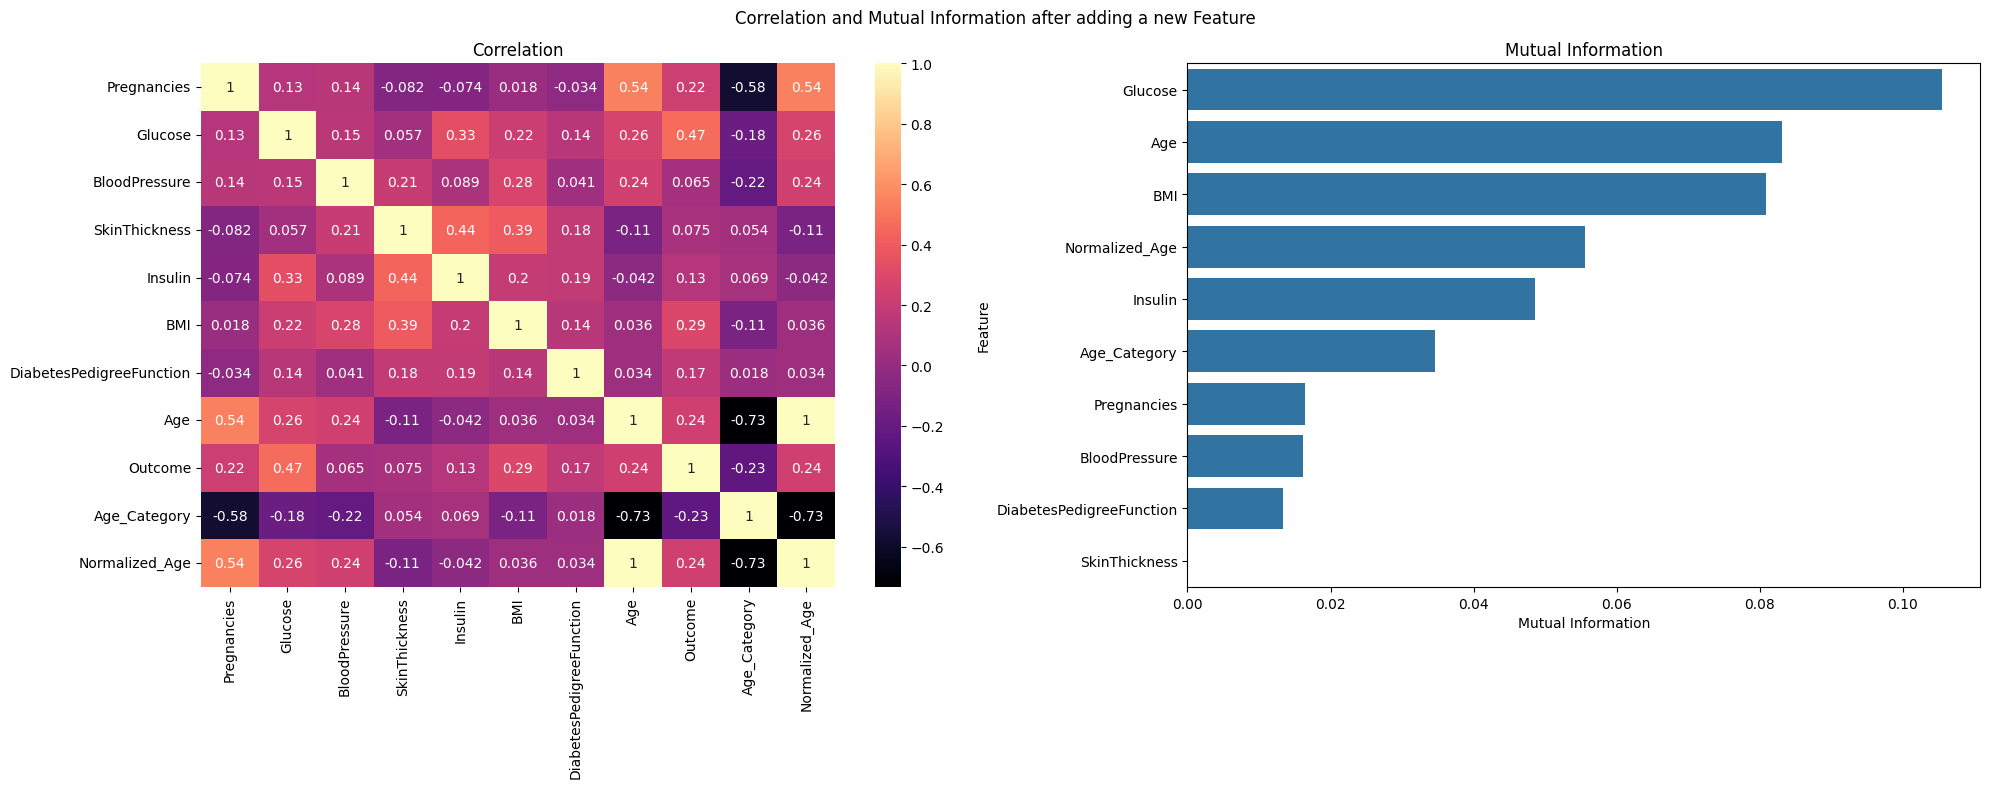

In [59]:
tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information after adding a new Feature')
plt.tight_layout()
plt.show()

In [60]:
# df['Age_Category'].value_counts()
# def preprocess_origin_cols(df):
#     df["Age_Category"] = df["Age_Category"].map({0: "tenn",1: "adult", 2: "young", 3: "senior"})
#     return df
# data_tr = preprocess_origin_cols(data)
# data_tr.head()

In [61]:
# https://medium.com/@Coursesteach/supervised-learning-with-scikit-learn-part-11-removing-outliers-with-scikit-learn-59d6a2051d02
# Outliers
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Check if X is a DataFrame or NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # When X is a NumPy array, we need to handle columns by index
            data = pd.DataFrame(X)  # Convert it to DataFrame to make indexing easier
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Remove outliers
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        
        return data.values


In [62]:
# replace outliers with bound 
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplaceBound(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        """
        Initialize the OutlierRemover with the columns to check for outliers
        and the IQR threshold for detecting them.
        
        Parameters:
        cols (list): List of column indices or names to check for outliers.
        threshold (float): Multiplier for the IQR to define outliers. Typically 1.5 or 3.
        """
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self  # No fitting necessary for outlier removal
    
    def transform(self, X):
        # Check if X is a DataFrame or a NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # Convert NumPy array to DataFrame to handle columns by name
            data = pd.DataFrame(X)
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Replace outliers with the upper or lower bound
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            
            # Replace outliers in the data
            data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])  # Replace high outliers with the upper bound
            data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])  # Replace low outliers with the lower bound
        
        return data.values  # Return as a NumPy array for compatibility with scikit-learn



In [63]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplaceWithMedian(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        """
        Initialize the OutlierRemover with the columns to check for outliers
        and the IQR threshold for detecting them.
        
        Parameters:
        cols (list): List of column indices or names to check for outliers.
        threshold (float): Multiplier for the IQR to define outliers. Typically 1.5 or 3.
        """
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self  # No fitting necessary for outlier removal
    
    def transform(self, X):
        # Check if X is a DataFrame or a NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # Convert NumPy array to DataFrame to handle columns by name
            data = pd.DataFrame(X)
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Replace outliers with the median value
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            
            # Compute the median of the column
            median = data[col].median()

            # Replace outliers with the median
            data[col] = np.where(data[col] > upper_bound, median, data[col])  # Replace high outliers with the median
            data[col] = np.where(data[col] < lower_bound, median, data[col])  # Replace low outliers with the median
        
        return data.values  # Return as a NumPy array for compatibility with scikit-learn


In [64]:
from sklearn.model_selection import train_test_split
x= df.drop(columns='Outcome')
y= df['Outcome']

In [65]:
from sklearn.decomposition import PCA
# Create principal components object
pca = PCA()

# Fit your data
X_pca = pca.fit_transform(x)

# Create PCA dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca,columns=component_names)

# Check it out
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-75.716174,35.974397,7.281515,15.600832,16.626768,-3.462694,-0.644409,-0.730850,0.114060,0.000000e+00
1,-82.357603,-28.916812,5.489541,9.009700,3.449699,-5.603574,-2.622120,0.438536,-0.103456,5.551115e-17
2,-74.630031,67.887709,-19.495267,-5.598889,-10.406139,-7.146856,4.206871,1.062376,0.244054,4.996004e-16
3,11.078083,-34.907695,0.046376,1.339948,-7.627591,-2.575471,-0.786782,-0.246664,-0.267212,-6.106227e-16
4,89.744397,2.734191,-25.224566,18.972933,8.549963,9.469446,-3.697078,0.603870,1.658631,9.992007e-16


In [66]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=x.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Pregnancies,-0.002022,0.022680,0.022562,-0.049417,0.151369,0.004978,0.981359,0.102543,0.003608,4.217792e-17
Glucose,0.097811,0.972108,-0.143768,0.120223,-0.088028,-0.050657,0.001017,-0.000809,-0.000806,5.396748e-18
BloodPressure,0.016093,0.141998,0.922312,-0.261546,-0.234102,-0.075535,-0.001249,0.001110,0.000490,3.645231e-18
SkinThickness,0.060757,-0.057850,0.306832,0.883779,0.262038,-0.221537,-0.000510,0.001303,-0.002583,1.163039e-17
Insulin,0.993111,-0.094609,-0.020917,-0.065594,-0.000236,0.006139,0.001469,-0.000500,-0.000256,-1.812978e-18
BMI,0.014011,0.046984,0.132395,0.192713,0.022656,0.970661,-0.004302,0.014340,-0.003044,3.424896e-17
DiabetesPedigreeFunction,0.000537,0.000817,0.000639,0.002697,0.001633,0.002020,-0.006506,0.025569,0.999644,1.436621e-16
Age,-0.003565,0.140307,0.125898,-0.302844,0.916188,0.013116,-0.169492,0.064380,-0.003649,-1.666435e-02
Age_Category,0.000706,-0.011489,-0.013995,0.021105,-0.075631,-0.015109,-0.090187,0.992208,-0.025851,6.765213e-16
Normalized_Age,-0.000059,0.002338,0.002098,-0.005047,0.015270,0.000219,-0.002825,0.001073,-0.000061,9.998611e-01


In [67]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

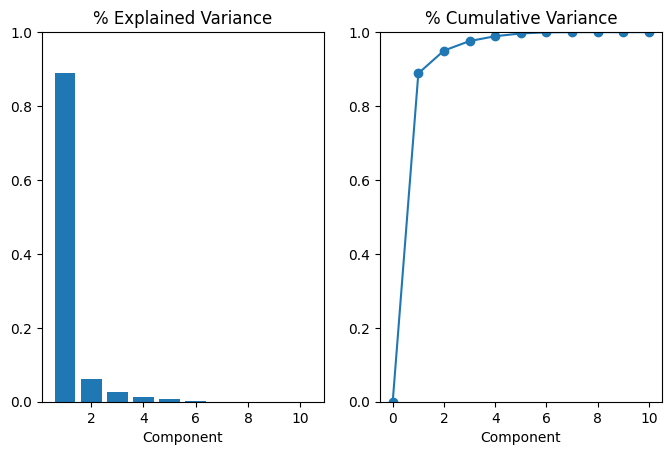

In [68]:
# Look at explained variance
plot_variance(pca)

In [69]:
x["PC1"] = X_pca["PC1"]

In [70]:
x_t,x_te,y_t,y_te= train_test_split(x,y,test_size=.25,random_state=20, stratify=y)

In [71]:
#importing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [72]:
lm=[] #Storing classification reports
cr=[] #Storing classification reports
cm_t=[] # Storing Confusion matrix for Training set
cm=[] # Storing Confusion matrix for Testing set
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
#numerics = ['int64', 'float64']
#num_data = data_tr.select_dtypes(include=numerics)

num_pipeline = Pipeline([
        ('outlier_remover', OutlierReplaceWithMedian(cols=[0, 2, 4, 5, 6, 7, 8, 9], threshold=1.5)),
        ('inputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()
         )
])

X_train_scaler = num_pipeline.fit_transform(x_t)
X_test_scaler = num_pipeline.fit_transform(x_te)

In [74]:
# Logistic regression : https://medium.com/@satyarepala/understanding-logistic-regression-a-step-by-step-explanation-9a404344964b
# KNN :https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4
# Support Vector Machine In Python : https://medium.com/@soumallya160/everything-you-need-to-know-about-support-vector-machine-8e343658c9e7
# LinearSVC : https://medium.com/@akhil0435/linear-svm-classification-40dde297c931
# Gaussian Naive Bayes: https://medium.com/@LSchultebraucks/gaussian-naive-bayes-19156306079b
# Perceptron :
# Hyper tuining technics : https://github.com/KumaarBalbir/HyperTuning / https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/
# poetry video : https://www.youtube.com/watch?v=V5rKVrVhEh8
# https://medium.com/@abhishekjainindore24/all-about-decision-trees-80ea55e37fef

In [75]:
# lgc= LogisticRegression()
# training_start = time.perf_counter()
# # model=lgc.fit(x_t,y_t)
# # with scaler
# model=lgc.fit(X_train_scaler,y_t)
# training_end = time.perf_counter()
# prediction_start= time.perf_counter()
# y_pred =model.predict(X_test_scaler)
# y_pred_proba = model.predict_proba(x_te)
# prediction_end= time.perf_counter()
# #acc_Lgc= round(lgc.score(x_t,y_t)* 100, 2)
# acc_Lgc_train = model.score(X_train_scaler,y_t)
# acc_Lgc_test = model.score(X_test_scaler, y_te)
# Lgc_train_time = training_end-training_start
# Lgc_prediction_time = prediction_end-prediction_start
# #print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy is: %3.2f" % (acc_Lgc))
# print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Train set is: %3.2f" %(acc_Lgc_train)+ "%")
# print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Test set is: %3.2f" %(acc_Lgc_test)+ "%")
# print("Time consumed for training: %4.3f seconds" % (Lgc_train_time))
# print("Time consumed for prediction: %6.5f seconds" % (Lgc_prediction_time))


In [76]:
reg=LogisticRegression(max_iter=10000) 
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
#nreg.fit(x_t,y_t)
nreg.fit(X_train_scaler,y_t)
print(nreg.best_params_)
print(nreg.best_score_)
nreg=nreg.best_estimator_
predt1=nreg.predict(X_train_scaler)
pred1=nreg.predict(X_test_scaler)
lm.append("nreg")
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'solver': 'saga', 'penalty': 'l1', 'C': 1}
0.7536600120992135


In [77]:
# from sklearn.linear_model import Lasso
# lasso = Lasso()
# params = {"alpha":np.arange(0.00001, 10, 500)}
# nlasso=RandomizedSearchCV(lasso,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
# #nreg.fit(x_t,y_t)
# nlasso.fit(X_train_scaler,y_t)
# print(nlasso.best_params_)
# print(nlasso.best_score_)
# nlasso=nlasso.best_estimator_
# predt1=nlasso.predict(X_train_scaler)
# pred1=nlasso.predict(X_test_scaler)
# cr.append(classification_report(y_te,pred1))
# cm_t.append(confusion_matrix(y_t,predt1))
# cm.append(confusion_matrix(y_te,pred1))
# acc_t.append(accuracy_score(y_t,predt1))
# acc.append(accuracy_score(y_te,pred1))
# p_t.append(precision_score(y_t,predt1))
# p.append(precision_score(y_te,pred1))
# r_t.append(recall_score(y_t,predt1))
# r.append(recall_score(y_te,pred1))
# f1_t.append(f1_score(y_t,predt1))
# f1.append(f1_score(y_te,pred1))

In [78]:
knn=KNeighborsClassifier() 
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nknn.fit(X_train_scaler,y_t)
print(nknn.best_params_)
print(nknn.best_score_)
nknn=nknn.best_estimator_
predt1=nknn.predict(X_train_scaler)
pred1=nknn.predict(X_test_scaler)
lm.append("nknn")
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'n_neighbors': 14}
0.7258015728977616


In [79]:
from sklearn.svm import SVC 
svc = SVC()
params={"C" : [0.1, 1, 10, 100, 1000] ,"kernel":['linear', 'rbf', 'poly'],"degree" : [0, 1, 2, 3, 4, 5, 6],"gamma":[0.1, 1, 10, 100]}
svcc=RandomizedSearchCV(svc,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
svcc.fit(X_train_scaler,y_t)
print(svcc.best_params_)
print(svcc.best_score_)

svcc=svcc.best_estimator_
predt1=svcc.predict(X_train_scaler)
pred1=svcc.predict(X_test_scaler)
lm.append("svcc")
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'kernel': 'linear', 'gamma': 100, 'degree': 2, 'C': 1000}
0.7502419842710224


In [80]:
# def plot_svm_boundary(model,X,y):
    
#     X = X
#     y = y.values
    
#     # Scatter Plot
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
#     # plot the decision function
#     ax = plt.gca()
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()

#     # create grid to evaluate model
#     xx = np.linspace(xlim[0], xlim[1], 30)
#     yy = np.linspace(ylim[0], ylim[1], 30)
#     YY, XX = np.meshgrid(yy, xx)
#     xy = np.vstack([XX.ravel(), YY.ravel()]).T
#     Z = model.decision_function(xy).reshape(XX.shape)

#     # plot decision boundary and margins
#     ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#                linestyles=['--', '-', '--'])
#     # plot support vectors
#     ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
#                linewidth=1, facecolors='none', edgecolors='k')
#     plt.show()

In [81]:
# plt.subplot(2,2,1)
# plot_svm_boundary(svcc_te,X_train_scaler,y_t)

In [82]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
params={'var_smoothing': np.logspace(0,-9, num=100)}
gaussh=RandomizedSearchCV(gauss,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
gaussh.fit(X_train_scaler,y_t)
print(gaussh.best_params_)
print(gaussh.best_score_)

gausshb=gaussh.best_estimator_
predt1=gausshb.predict(X_train_scaler)
pred1=gausshb.predict(X_test_scaler)
lm.append("gausshb")
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'var_smoothing': 0.12328467394420659}
0.7017241379310345


In [83]:
from sklearn.linear_model import Perceptron
per = Perceptron()
params={'max_iter': [40], 'eta0':[0.1], 'random_state':[1]}
perh=RandomizedSearchCV(per,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
perh.fit(X_train_scaler,y_t)
print(perh.best_params_)
print(perh.best_score_)
lm.append("perh")
perb=perh.best_estimator_
predt1=perb.predict(X_train_scaler)
pred1=perb.predict(X_test_scaler)
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'random_state': 1, 'max_iter': 40, 'eta0': 0.1}
0.682486388384755


In [84]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the model and parameter grid
sgd = SGDClassifier(max_iter=10000, random_state=42)
params = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': list(np.logspace(-4, 0, 20)),  # Regularization strength
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': list(np.logspace(-3, 0, 10))  # Initial learning rate
}

# RandomizedSearchCV for hyperparameter tuning
nsgd = RandomizedSearchCV(
    sgd, 
    param_distributions=params, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=10, 
    random_state=42
)

# Fit the model
nsgd.fit(X_train_scaler, y_t)

# Output the best parameters and best score
print(nsgd.best_params_)
print(nsgd.best_score_)

# Update to the best estimator
nsgd = nsgd.best_estimator_

# Predictions
predt1 = nsgd.predict(X_train_scaler)
pred1 = nsgd.predict(X_test_scaler)

# Metrics collection
lm.append("nsgd")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))


{'penalty': 'l1', 'loss': 'squared_hinge', 'learning_rate': 'constant', 'eta0': 0.0021544346900318843, 'alpha': 0.03359818286283781}
0.7606170598911072


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter space
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, 21)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}

# Randomized search with cross-validation
ntree = RandomizedSearchCV(tree, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
ntree.fit(X_train_scaler, y_t)

# Best parameters and best score
print(ntree.best_params_)
print(ntree.best_score_)

# Use the best estimator
ntree = ntree.best_estimator_

# Predictions
predt1 = ntree.predict(X_train_scaler)
pred1 = ntree.predict(X_test_scaler)

# Metrics calculation
lm.append("ntree")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))


{'splitter': 'best', 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_depth': 5, 'criterion': 'gini'}
0.7433454325468845


In [86]:
acc

[0.8072916666666666,
 0.765625,
 0.7916666666666666,
 0.7447916666666666,
 0.6614583333333334,
 0.8072916666666666,
 0.7760416666666666]

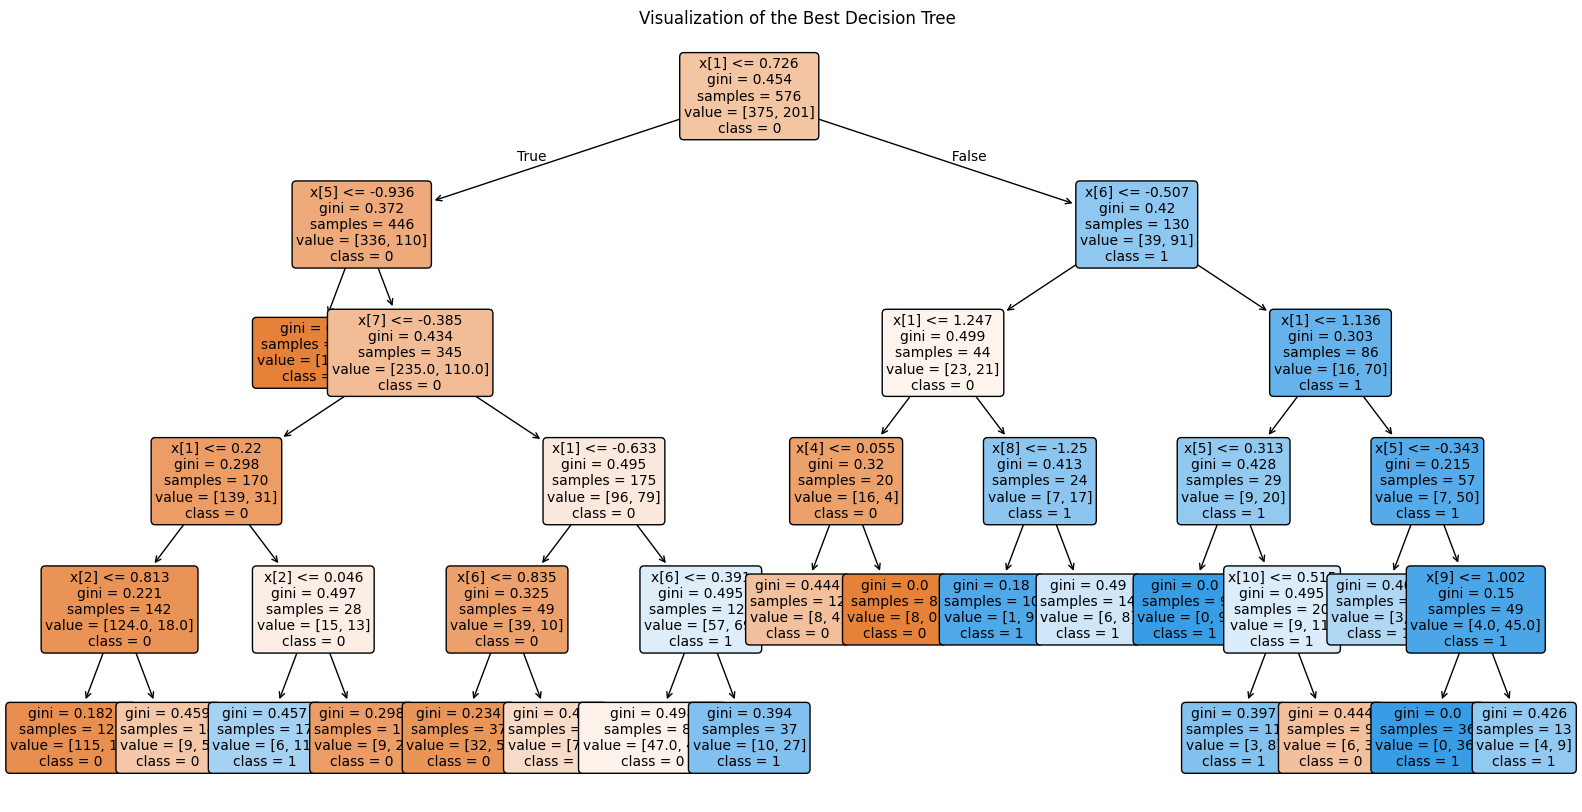

In [87]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the best decision tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(
    ntree, 
    feature_names=X_train_scaler.columns if hasattr(X_train_scaler, 'columns') else None,
    class_names=[str(cls) for cls in ntree.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualization of the Best Decision Tree")
plt.show()


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize Random Forest Classifier
forest = RandomForestClassifier(random_state=42)

# Define hyperparameter space
params = {
    'n_estimators': list(range(50, 201, 50)),  # Number of trees
    'max_depth': list(range(1, 21)),  # Maximum depth of the trees
    'min_samples_split': list(range(2, 11)),  # Minimum samples required to split a node
    'min_samples_leaf': list(range(1, 11)),  # Minimum samples required in a leaf node
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Randomized search with cross-validation
nforest = RandomizedSearchCV(forest, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
nforest.fit(X_train_scaler, y_t)

# Best parameters and best score
print(nforest.best_params_)
print(nforest.best_score_)

# Use the best estimator
nforest = nforest.best_estimator_

# Predictions
predt1 = nforest.predict(X_train_scaler)
pred1 = nforest.predict(X_test_scaler)

# Metrics calculation
lm.append("nforest")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 18, 'criterion': 'gini'}
0.7518451300665457


<function matplotlib.pyplot.show(close=None, block=None)>

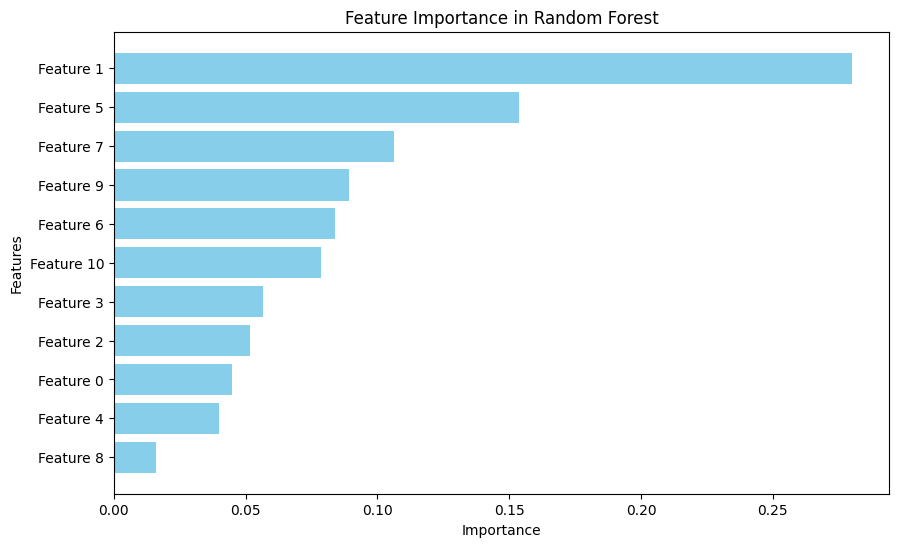

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from the Random Forest model
importances = nforest.feature_importances_
feature_names = X_train_scaler.columns if hasattr(X_train_scaler, 'columns') else [f'Feature {i}' for i in range(len(importances))]

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show


In [109]:
# Convert data into a DataFrame
data = {
    "ML name": lm,
    "Classification Report": cr,
    "Confusion Matrix (Train)": cm_t,
    "Confusion Matrix (Test)": cm,
    "Accuracy (Train)": acc_t,
    "Accuracy (Test)": acc,
    "Precision (Train)": p_t,
    "Precision (Test)": p,
    "Recall (Train)": r_t,
    "Recall (Test)": r,
    "F1 Score (Train)": f1_t,
    "F1 Score (Test)": f1,
}

metrics_df = pd.DataFrame(data)
# Example: Define weights for each KPI (modify as per your needs)
weights = {
    "Accuracy (Train)":1,
    "Accuracy (Test)": 1,
    "Precision (Test)": 1,
    "Recall (Test)": 1,
    "F1 Score (Test)": 1,
}
# Calculate the weighted composite score
metrics_df["Composite Score"] = (
    metrics_df["Accuracy (Train)"] * weights["Accuracy (Train)"] +
    metrics_df["Accuracy (Test)"] * weights["Accuracy (Test)"] +
    metrics_df["Precision (Test)"] * weights["Precision (Test)"] +
    metrics_df["Recall (Test)"] * weights["Recall (Test)"] +
    metrics_df["F1 Score (Test)"] * weights["F1 Score (Test)"]
)

# Rank models based on the composite score
metrics_df = metrics_df.sort_values(by="Composite Score", ascending=False)

# Reset index for better readability
metrics_df.reset_index(drop=True, inplace=True)

# Display the reordered DataFrame with the best model in the first row
print(metrics_df)

    ML name                              Classification Report  \
0   bagging                precision    recall  f1-score   ...   
1   nforest                precision    recall  f1-score   ...   
2      nreg                precision    recall  f1-score   ...   
3      nsgd                precision    recall  f1-score   ...   
4   bagging                precision    recall  f1-score   ...   
5   bagging                precision    recall  f1-score   ...   
6      svcc                precision    recall  f1-score   ...   
7   bagging                precision    recall  f1-score   ...   
8     ntree                precision    recall  f1-score   ...   
9   bagging                precision    recall  f1-score   ...   
10     nknn                precision    recall  f1-score   ...   
11  bagging                precision    recall  f1-score   ...   
12  gausshb                precision    recall  f1-score   ...   
13  bagging                precision    recall  f1-score   ...   
14     per

In [111]:
import pandas as pd

# Counter for Bagging occurrences
bagging_count = 0

def rename_bagging(row):
    global bagging_count
    if row == 'bagging':
        bagging_count += 1
        return f'Bagging {bagging_count}'
    return row

# Apply renaming logic
metrics_df['ML name'] = metrics_df['ML name'].apply(rename_bagging)

print(metrics_df)


      ML name                              Classification Report  \
0   Bagging 1                precision    recall  f1-score   ...   
1     nforest                precision    recall  f1-score   ...   
2        nreg                precision    recall  f1-score   ...   
3        nsgd                precision    recall  f1-score   ...   
4   Bagging 2                precision    recall  f1-score   ...   
5   Bagging 3                precision    recall  f1-score   ...   
6        svcc                precision    recall  f1-score   ...   
7   Bagging 4                precision    recall  f1-score   ...   
8       ntree                precision    recall  f1-score   ...   
9   Bagging 5                precision    recall  f1-score   ...   
10       nknn                precision    recall  f1-score   ...   
11  Bagging 6                precision    recall  f1-score   ...   
12    gausshb                precision    recall  f1-score   ...   
13  Bagging 7                precision    recall

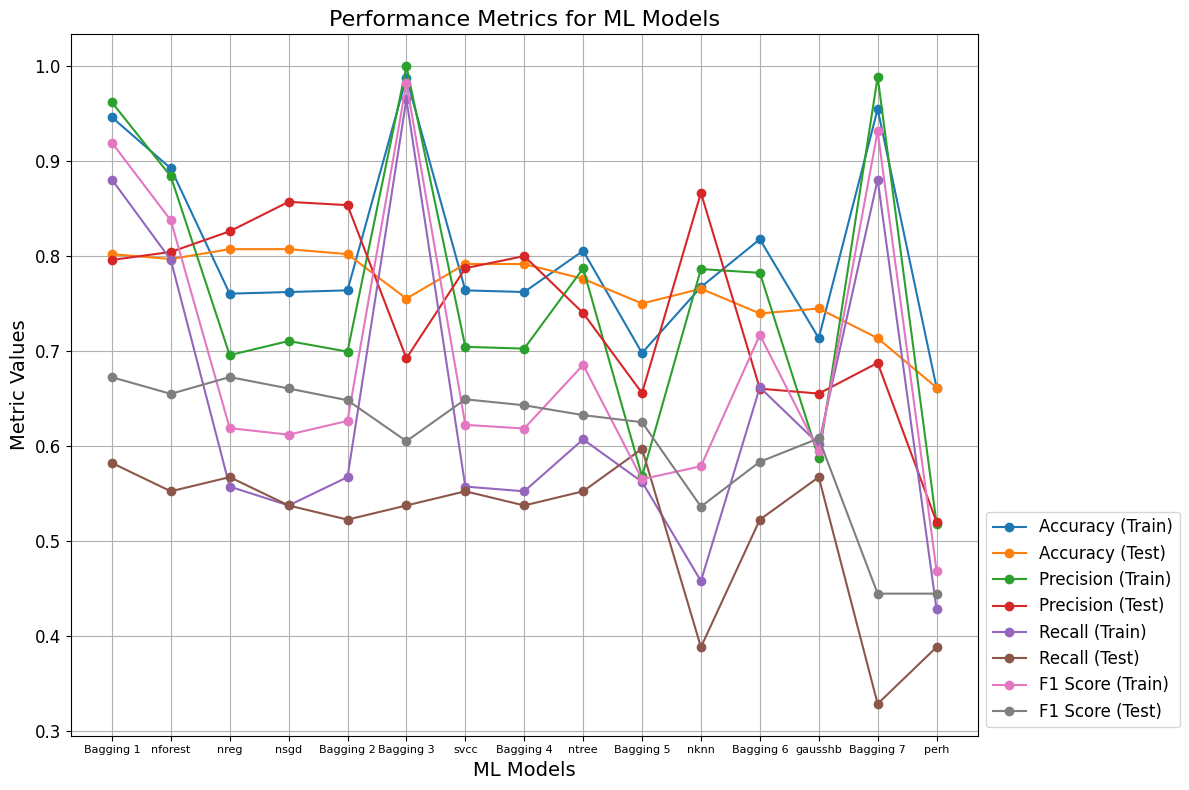

In [113]:
# Plotting a curve graphic for each metric
plt.figure(figsize=(12, 8))

# Iterate over all metrics to plot
metrics = [
    "Accuracy (Train)", "Accuracy (Test)",
    "Precision (Train)", "Precision (Test)",
    "Recall (Train)", "Recall (Test)",
    "F1 Score (Train)", "F1 Score (Test)"
]

for metric in metrics:
    plt.plot(metrics_df["ML name"], metrics_df[metric], label=metric, marker='o')

# Customizing the plot
plt.title("Performance Metrics for ML Models", fontsize=16)
plt.xlabel("ML Models", fontsize=14)
plt.ylabel("Metric Values", fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.legend(loc="lower left", fontsize=12, bbox_to_anchor=(1, 0))
plt.grid(True)
plt.tight_layout()

In [96]:
reg=LogisticRegression(max_iter=100) 
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,10))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
from sklearn.svm import SVC 
svc = SVC()
params={"C" : [0.1, 1, 10, 100] ,"kernel":['linear', 'rbf', 'poly'],"degree" : [0, 1, 2, 3, 4, 5, 6],"gamma":[0.1, 1, 10, 100]}
svcc=RandomizedSearchCV(svc,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
params={'var_smoothing': np.logspace(0,-9, num=100)}
gaussh=RandomizedSearchCV(gauss,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
from sklearn.linear_model import Perceptron
per = Perceptron()
params={'max_iter': [40], 'eta0':[0.1], 'random_state':[1]}
perh=RandomizedSearchCV(per,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
knn=KNeighborsClassifier() 
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
sgd = SGDClassifier(max_iter=10000, random_state=42)
params = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': list(np.logspace(-4, 0, 20)),  # Regularization strength
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': list(np.logspace(-3, 0, 10))  # Initial learning rate
}
nsgd = RandomizedSearchCV(sgd, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, 21)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
ntree = RandomizedSearchCV(tree, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
forest = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': list(range(50, 201, 50)),  # Number of trees
    'max_depth': list(range(1, 21)),  # Maximum depth of the trees
    'min_samples_split': list(range(2, 11)),  # Minimum samples required to split a node
    'min_samples_leaf': list(range(1, 11)),  # Minimum samples required in a leaf node
    'criterion': ['gini', 'entropy']  # Split criterion
}
nforest = RandomizedSearchCV(forest, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)



In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def bagging_predictions(estimator, X_train, y_train, X_test, y_test, n_jobs=-1, random_state=None):
    """
    Perform bagging using a base classifier and evaluate on test data.

    Parameters:
    ----------
    estimator: object
        The base classifier from which the ensemble is grown.
    X_train: array-like
        Training features.
    y_train: array-like
        Training labels.
    X_test: array-like
        Test features.
    y_test: array-like
        Test labels.
    n_jobs: int, default=-1
        The number of jobs to run in parallel for `fit`.
    random_state: int, default=None
        Controls the randomness of the estimator.

    Returns:
    -------
    br_y_pred: array
        Predictions on test data for the base classifier.
    """

    # Create the BaggingClassifier with the base estimator
    clf = BaggingClassifier(estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True,  # Samples are drawn with replacement
                            n_jobs=n_jobs,
                            random_state=random_state)
    
    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    br_y_pred = clf.predict(X_test)
    br_y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluate model performance
    accuracy = accuracy_score(y_test, br_y_pred)
    print(f"Accuracy for base estimator {clf.estimator_}: {accuracy:.4f}")

    if br_y_prob is not None:
        auc = roc_auc_score(y_test, br_y_prob)
        print(f"AUC-ROC for base estimator {clf.estimator_}: {auc:.4f}")
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, br_y_pred))

    return br_y_pred


In [ ]:
from sklearn.metrics import accuracy_score

# Stack predictions from different classifiers
predictions = np.column_stack((
    bagging_predictions(nreg,X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123),
    bagging_predictions(gaussh,X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123),
    bagging_predictions(svcc,X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123),
    bagging_predictions(nknn,X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123),
     
))


print(f"Bagged predictions shape: {predictions.shape}")

# Aggregate predictions using majority voting
y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)
print("Aggregated predictions (y_pred) shape:", y_pred.shape)

# Evaluate the aggregated predictions
accuracy = accuracy_score(y_te, y_pred)


print(f'\nBagging Accuracy = {accuracy:.4f}')


# Metrics calculation
lm.append("bagging")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))


Accuracy for base estimator RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   random_state=42, scoring='accuracy'): 0.8073
AUC-ROC for base estimator RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   random_state=42, scoring='accuracy'): 0.8688

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       125
           1       0.86      0.54      0.66        67

    accuracy                           0.81       192
   macro av

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def bagging_predictions(estimator, X_train, y_train, X_test, y_test, n_jobs=-1, random_state=None):
    """
    Perform bagging using a base classifier and evaluate on test data.

    Parameters:
    ----------
    estimator: object
        The base classifier from which the ensemble is grown.
    X_train: array-like
        Training features.
    y_train: array-like
        Training labels.
    X_test: array-like
        Test features.
    y_test: array-like
        Test labels.
    n_jobs: int, default=-1
        The number of jobs to run in parallel for `fit`.
    random_state: int, default=None
        Controls the randomness of the estimator.

    Returns:
    -------
    br_y_pred: array
        Predictions on test data for the base classifier.
    """

    # Create the BaggingClassifier with the base estimator
    clf = BaggingClassifier(estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True,  # Samples are drawn with replacement
                            n_jobs=n_jobs,
                            random_state=random_state)
    
    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    br_y_pred = clf.predict(X_test)
    br_y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluate model performance
    accuracy = accuracy_score(y_test, br_y_pred)
    print(f"Accuracy for base estimator {clf.estimator_}: {accuracy:.4f}")

    if br_y_prob is not None:
        auc = roc_auc_score(y_test, br_y_prob)
        print(f"AUC-ROC for base estimator {clf.estimator_}: {auc:.4f}")
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, br_y_pred))

    # Calculate additional metrics
    pred1 = br_y_pred
    predt1 = clf.predict(X_train)  # predictions on train set
    lm.append("bagging")
    cr.append(classification_report(y_test, pred1))
    cm_t.append(confusion_matrix(y_train, predt1))
    cm.append(confusion_matrix(y_test, pred1))
    acc_t.append(accuracy_score(y_train, predt1))
    acc.append(accuracy_score(y_test, pred1))
    p_t.append(precision_score(y_train, predt1))
    p.append(precision_score(y_test, pred1))
    r_t.append(recall_score(y_train, predt1))
    r.append(recall_score(y_test, pred1))
    f1_t.append(f1_score(y_train, predt1))
    f1.append(f1_score(y_test, pred1))

    return br_y_pred


In [100]:
# Assuming you have defined nreg, gaussh, svcc, nknn, and your data (X_train_scaler, y_t, X_test_scaler, y_te)

# Call bagging_predictions for each classifier
bagging_predictions(nreg, X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(gaussh, X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(svcc, X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(nknn, X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(nsgd, X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(tree , X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(nforest , X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)


Accuracy for base estimator RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   random_state=42, scoring='accuracy'): 0.8021
AUC-ROC for base estimator RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   random_state=42, scoring='accuracy'): 0.8693

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       125
           1       0.85      0.52      0.65        67

    accuracy                           0.80       192
   macro av

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
# Create the StackingClassifier
models_scores = []
estimators = [
    ('nreg', nreg),  # Replace `model1` with your classifier
    ('gaussh', gaussh),
     ('svcc',svcc),
     ('nknn',nknn),  # Replace `model2` with another classifier
]
final_estimator = gaussh
n_jobs = -1
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5, n_jobs=n_jobs, passthrough=True)

# Fit the stacking model
stack.fit(X_train_scaler, y_t)

# Predict probabilities and class labels for evaluation
y_pred_proba = stack.predict_proba(X_test_scaler)[:, 1]  # Probabilities for the positive class
y_pred = stack.predict(X_test_scaler)  # Predicted class labels

# Evaluate the model
accuracy = accuracy_score(y_te, y_pred)
roc_auc = roc_auc_score(y_te, y_pred_proba)

# Store the results
models_scores.append(['Stacking', accuracy, roc_auc])

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Accuracy: 0.7552
ROC AUC: 0.8461
